In [55]:
%matplotlib inline
import urllib
import time
import matplotlib.pyplot as plt
url = 'http://atlstats.web.cern.ch/atlstats/zeroaccess/2016-07-25/list-2016-07-25'


In [58]:
filehandle = urllib.urlopen(url)

In [35]:
filehandle = urllib.urlopen(url)
datatypes = {}
i = 0
for line in filehandle:
    line = line.rstrip('\n')
    i += 1
    if line.find('DAOD') > -1:
        #print line.split()
        scope, name, size, created, nbreplicas = line.split('\t')
        project, run, stream, prodstep, datatype, tag = name.split('.')
        if datatype not in datatypes:
            datatypes[datatype] = 0
        #print size
        if size:
            datatypes[datatype] += int(size)
        #print  datatypes[datatype] 
    #if i % 1000 == 0: print i

print datatypes

{'DAOD_BPHY1': 14691985752341, 'DAOD_BPHY5': 4960120883549, 'DAOD_JETM5': 4591434723597, 'DAOD_JETM4': 40417565272971, 'DAOD_JETM7': 53514802476544, 'DAOD_JETM6': 81939452041306, 'DAOD_JETM1': 80932150322726, 'DAOD_JETM3': 14598410737855, 'DAOD_JETM2': 123530290911710, 'DAOD_JETM9': 184426830735692, 'DAOD_JETM8': 96523610111133, 'DAOD_IDNCB': 7867528279739, 'DAOD_EGZ': 9361510701194, 'DAOD_TCAL1': 18494332768, 'DAOD_SUSY14': 2825190008376, 'DAOD_SUSY13': 4822115290315, 'DAOD_SUSY12': 29580734197567, 'DAOD_SUSY11': 20977783133451, 'DAOD_SUSY10': 56692399827138, 'DAOD_L1CALO2': 109612020858328, 'DAOD_L1CALO1': 21734564426850, 'DAOD_HION5': 4269799649, 'DAOD_EXOT16': 8452782479313, 'DAOD_IDTIDE': 4696347122826, 'DAOD_ZMUMU': 16804125841471, 'DAOD_HIGG3D3': 15397848531201, 'DAOD_HION3': 967150361, 'DAOD_HIGG3D1': 95183481511343, 'DAOD_EXOT9': 66371149871573, 'DAOD_EXOT8': 384114091884729, 'DAOD_EXOT5': 72512303976674, 'DAOD_EXOT4': 354704940500867, 'DAOD_EXOT7': 58238458784849, 'DAOD_EXOT6

([<matplotlib.axis.XTick at 0x7f8b22a6e9d0>,
 <a list of 117 Text xticklabel objects>)

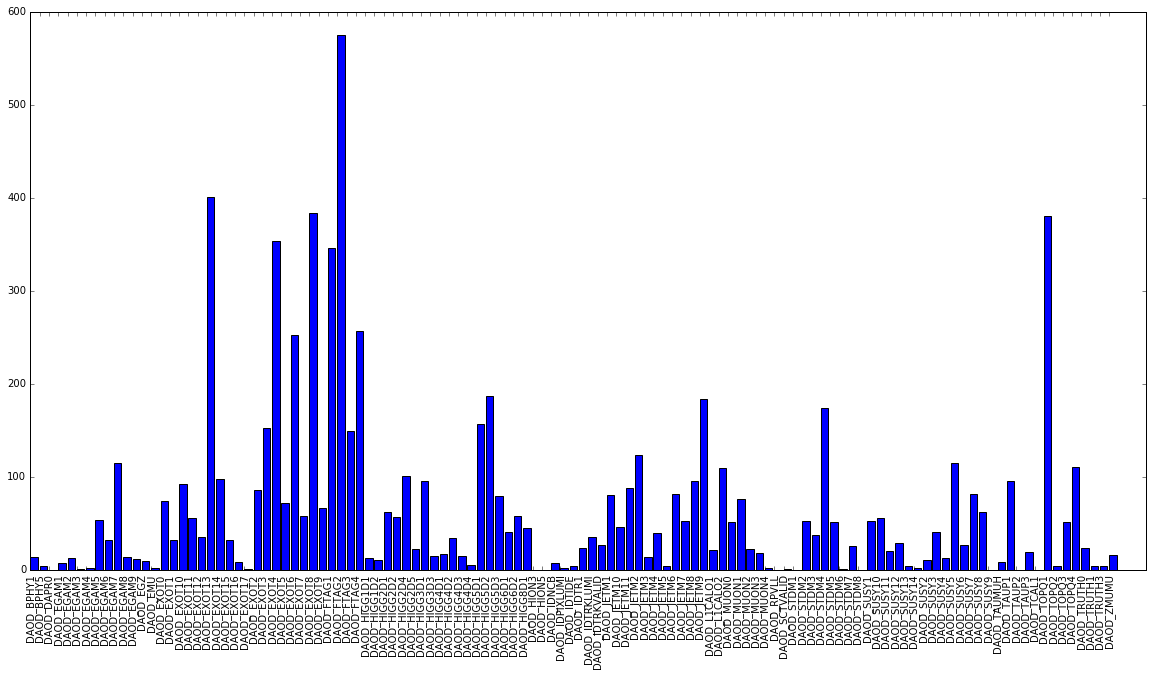

In [52]:
plt.figure(figsize=(20,10))
x_values = [_ for _ in range(len(datatypes))]
x_datatypes = datatypes.keys()
x_datatypes.sort()
y_datatypes = []
for key in x_datatypes:
    y_datatypes.append(datatypes[key]/1000**4)
plt.bar(x_values, y_datatypes)
plt.xticks(x_values, x_datatypes, rotation='vertical')

In [63]:
filehandle = urllib.urlopen(url)
time_datatypes = {}
i = 0
for line in filehandle:
    line = line.rstrip('\n')
    i += 1
    if line.find('DAOD') > -1:
        #print line.split()
        scope, name, size, created, nbreplicas = line.split('\t')
        project, run, stream, prodstep, datatype, tag = name.split('.')
        created_at = time.gmtime(float(created))
        if '%s-%s' % (created_at[1], created_at[0]) not in time_datatypes:
            time_datatypes['%s-%s' % (created_at[1], created_at[0])] = {}

        if datatype not in time_datatypes['%s-%s' % (created_at[1], created_at[0])]:
            time_datatypes['%s-%s' % (created_at[1], created_at[0])][datatype] = 0
        #print size
        if size:
            time_datatypes['%s-%s' % (created_at[1], created_at[0])][datatype] += int(size)
        #print  datatypes[datatype] 
    #if i % 1000 == 0: print i

print time_datatypes

{'7-2016': {'DAOD_BPHY1': 4587039380290, 'DAOD_BPHY5': 1890399833627, 'DAOD_HION5': 4269799649, 'DAOD_JETM4': 2996231661620, 'DAOD_JETM7': 4955261643271, 'DAOD_JETM6': 31530037946736, 'DAOD_JETM1': 13138184537474, 'DAOD_JETM3': 798014055677, 'DAOD_JETM2': 23283739104695, 'DAOD_JETM9': 14262760614406, 'DAOD_JETM8': 20319875827692, 'DAOD_IDNCB': 7263239253982, 'DAOD_EGZ': 4412082259607, 'DAOD_SUSY14': 947122477604, 'DAOD_SUSY13': 1862534666502, 'DAOD_SUSY12': 17914143303513, 'DAOD_SUSY11': 6601618736566, 'DAOD_SUSY10': 35127719316364, 'DAOD_L1CALO2': 14403204839992, 'DAOD_L1CALO1': 8460548567726, 'DAOD_JETM5': 966117801565, 'DAOD_IDTIDE': 987960911929, 'DAOD_ZMUMU': 9951696769030, 'DAOD_HIGG3D3': 9199294055197, 'DAOD_HION3': 967150361, 'DAOD_HIGG3D1': 35036961278185, 'DAOD_EXOT9': 2427857582775, 'DAOD_EXOT8': 142341830544420, 'DAOD_EXOT5': 29482771609880, 'DAOD_EXOT4': 271719374834163, 'DAOD_EXOT7': 17789858437584, 'DAOD_EXOT6': 26797143222184, 'DAOD_EXOT1': 7410943599691, 'DAOD_EXOT0': 

In [64]:
series = time_datatypes.keys()
series.sort()

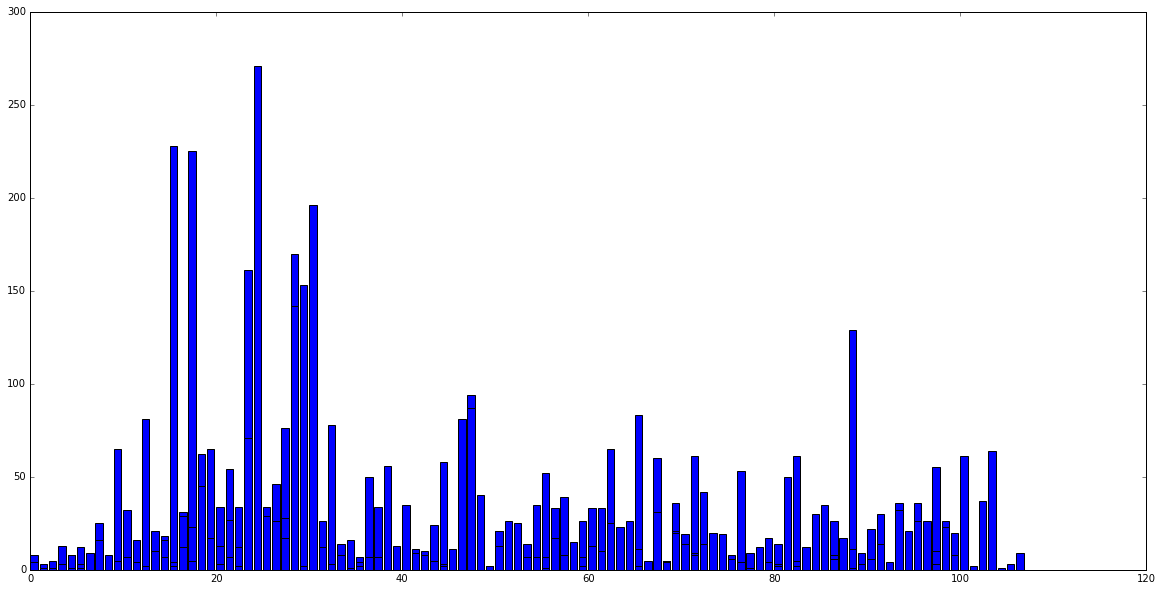

In [67]:
plt.figure(figsize=(20,10))
for serie in series:
    datatypes = time_datatypes[serie]
    x_values = [_ for _ in range(len(datatypes))]
    x_datatypes = datatypes.keys()
    x_datatypes.sort()
    y_datatypes = []
    for key in x_datatypes:
        y_datatypes.append(datatypes[key]/1000**4)
    plt.bar(x_values, y_datatypes)